In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Use multi-hot encoding because not all reviews are same length

In [4]:
import numpy as np

def vector_seq(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vector_seq(train_data)
x_test = vector_seq(test_data)

In [8]:
x_train[0][5]

1.0

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
print(tensorflow.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [27]:
model.compile(optimizer="rmsprop",
            loss="mse",
            metrics=["accuracy"])

In [13]:
#Set aside 10k examples from both test and train data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
#train model
#history = model.fit(partial_x_train,
#    partial_y_train,
#    epochs=20,
#    batch_size=512,
#    validation_data=(x_val, y_val))

In [19]:
history_dictionary = history.history
history_dictionary.keys(
)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

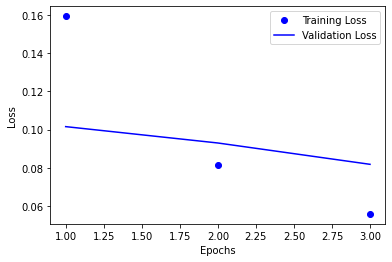

In [20]:
import matplotlib.pyplot as plt
loss_values = history_dictionary["loss"]
val_loss_values = history_dictionary["val_loss"]
epochs = range(1, len(loss_values) + 1) #is a range from one to the length of training examples plus one
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

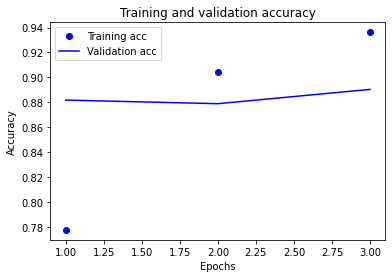

In [21]:
plt.clf()
acc = history_dictionary["accuracy"]
val_acc = history_dictionary["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
#Train now with only four epochs because can see in graphs accuracy and loss respectively go down and up after four epochs; overfit
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0446 - accuracy: 0.9506 - val_loss: 0.0832 - val_accuracy: 0.8856
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0330 - accuracy: 0.9649 - val_loss: 0.0852 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0259 - accuracy: 0.9742 - val_loss: 0.0858 - val_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0213 - accuracy: 0.9782 - val_loss: 0.0879 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0161 - accuracy: 0.9853 - val_loss: 0.0919 - val_accuracy: 0.8773
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0121 - accuracy: 0.9887 - val_loss: 0.0917 - val_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0107 - accuracy: 0.9900 - val_loss: 0.0944 - val_accuracy: 0.8755
Epoch 8/20
30

In [17]:
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 [==============================] - 1s 17ms/step - loss: 0.0615 - accuracy: 0.9208
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.0891 - accuracy: 0.8788


In [22]:
results

[0.0890701562166214, 0.8787999749183655]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.11914101],
       [0.99970996],
       [0.9280335 ],
       ...,
       [0.23175947],
       [0.08390263],
       [0.57215   ]], dtype=float32)